
> **ISO2024 INTRODUCTORY SPATIAL 'OMICS ANALYSIS**
>
>
>- HYBRID : TORONTO & ZOOM
>- 9TH JULY 2024 <br>

>**Module 5 : Module 5 : Realizing the spatial potential in your datasets, part 1 ** <BR>
>
>**Instructor : Shamini Ayyadhury**
>
---

> TOPICS COVERED

* A. Centrality scores *
* B. Ripley's L statistics *

***

In [1]:
### Import packages

### we will be using the builtu-in functions of squidpy to perform the analysis

import squidpy as sq
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
out = '/home/shamini/data/projects/spatial_workshop/out/module3/objects/' ### data directory

DATASETS:
1. For this lesson, we will set the stage using datasets from module 2.

ANALYSIS :
The codes for this pipeline were predominanly re-produced and adapted from <https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_vizgen_mouse_liver.html#network-centrality-scores>

In [3]:
adata = sc.read_h5ad(out + 'adata_module3b_banksy.h5ad.h5ad')
adata = adata[adata.obs['cell_label'].notna()]
adata

View of AnnData object with n_obs × n_vars = 59145 × 347
    obs: 'gene_counts', 'neg_counts', 'x_location', 'y_location', 'n_genes', 'n_counts', 'cell_label', 'labels_nonspatial_pc18_nc0.00_r0.30', 'labels_scaled_gaussian_pc18_nc0.25_r0.30', 'labels_scaled_gaussian_pc18_nc0.50_r0.30', 'labels_scaled_gaussian_pc18_nc0.75_r0.30', 'labels_scaled_gaussian_pc18_nc1.00_r0.30'
    var: 'n_cells'
    uns: 'cell_label_colors', 'labels_nonspatial_pc18_nc0.00_r0.30_colors', 'labels_scaled_gaussian_pc18_nc0.25_r0.30_colors', 'labels_scaled_gaussian_pc18_nc0.75_r0.30_colors', 'labels_scaled_gaussian_pc18_nc1.00_r0.30_colors', 'n_genes_mean', 'n_genes_med', 'pearson_residuals_normalization', 'spatial'
    obsm: 'pc18_banksy', 'spatial', 'umap18_banksy'

In [5]:
from copy import deepcopy


### Step 1: Calculate spatial neighbors
### PARTICIPANTS TO PLAY AROUND WITH THE PARAMETERS
sq.gr.spatial_neighbors(adata, coord_type="generic", n_rings=2, delaunay=True)


### calling squidpy function to calculate the centrality scores
sq.gr.centrality_scores(adata, "cell_label")
sc.set_figure_params(figsize=(20, 8))

# copy centrality data to new DataFrame
df_central = deepcopy(adata.uns["cell_label_centrality_scores"])

# sort clusters based on centrality scores
################################################
# closeness centrality - measure of how close the group is to other nodes.
ser_closeness = df_central["closeness_centrality"].sort_values(ascending=False)

# degree centrality - fraction of non-group members connected to group members.
# [Networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality)
# The degree centrality for a node v is the fraction of nodes it is connected to.
ser_degree = df_central["degree_centrality"].sort_values(ascending=False)

# clustering coefficient - measure of the degree to which nodes cluster together.
ser_cluster = df_central["average_clustering"].sort_values(ascending=False)

/home/shamini/anaconda3/envs/xenium/lib/python3.10/site-packages/squidpy/gr/_utils.py:194: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


Now we will take the top 5 and bottom 5 cell labels from the centrality closeness score output

['Astro', 'Oligo', 'Macrophage', 'Endo', 'L6 IT']
['NP', 'CR', 'L5 PT', 'Serpinf1', 'Peri']


Text(0.0, 1.0, 'Bottom 5 clusters based on closeness centrality')

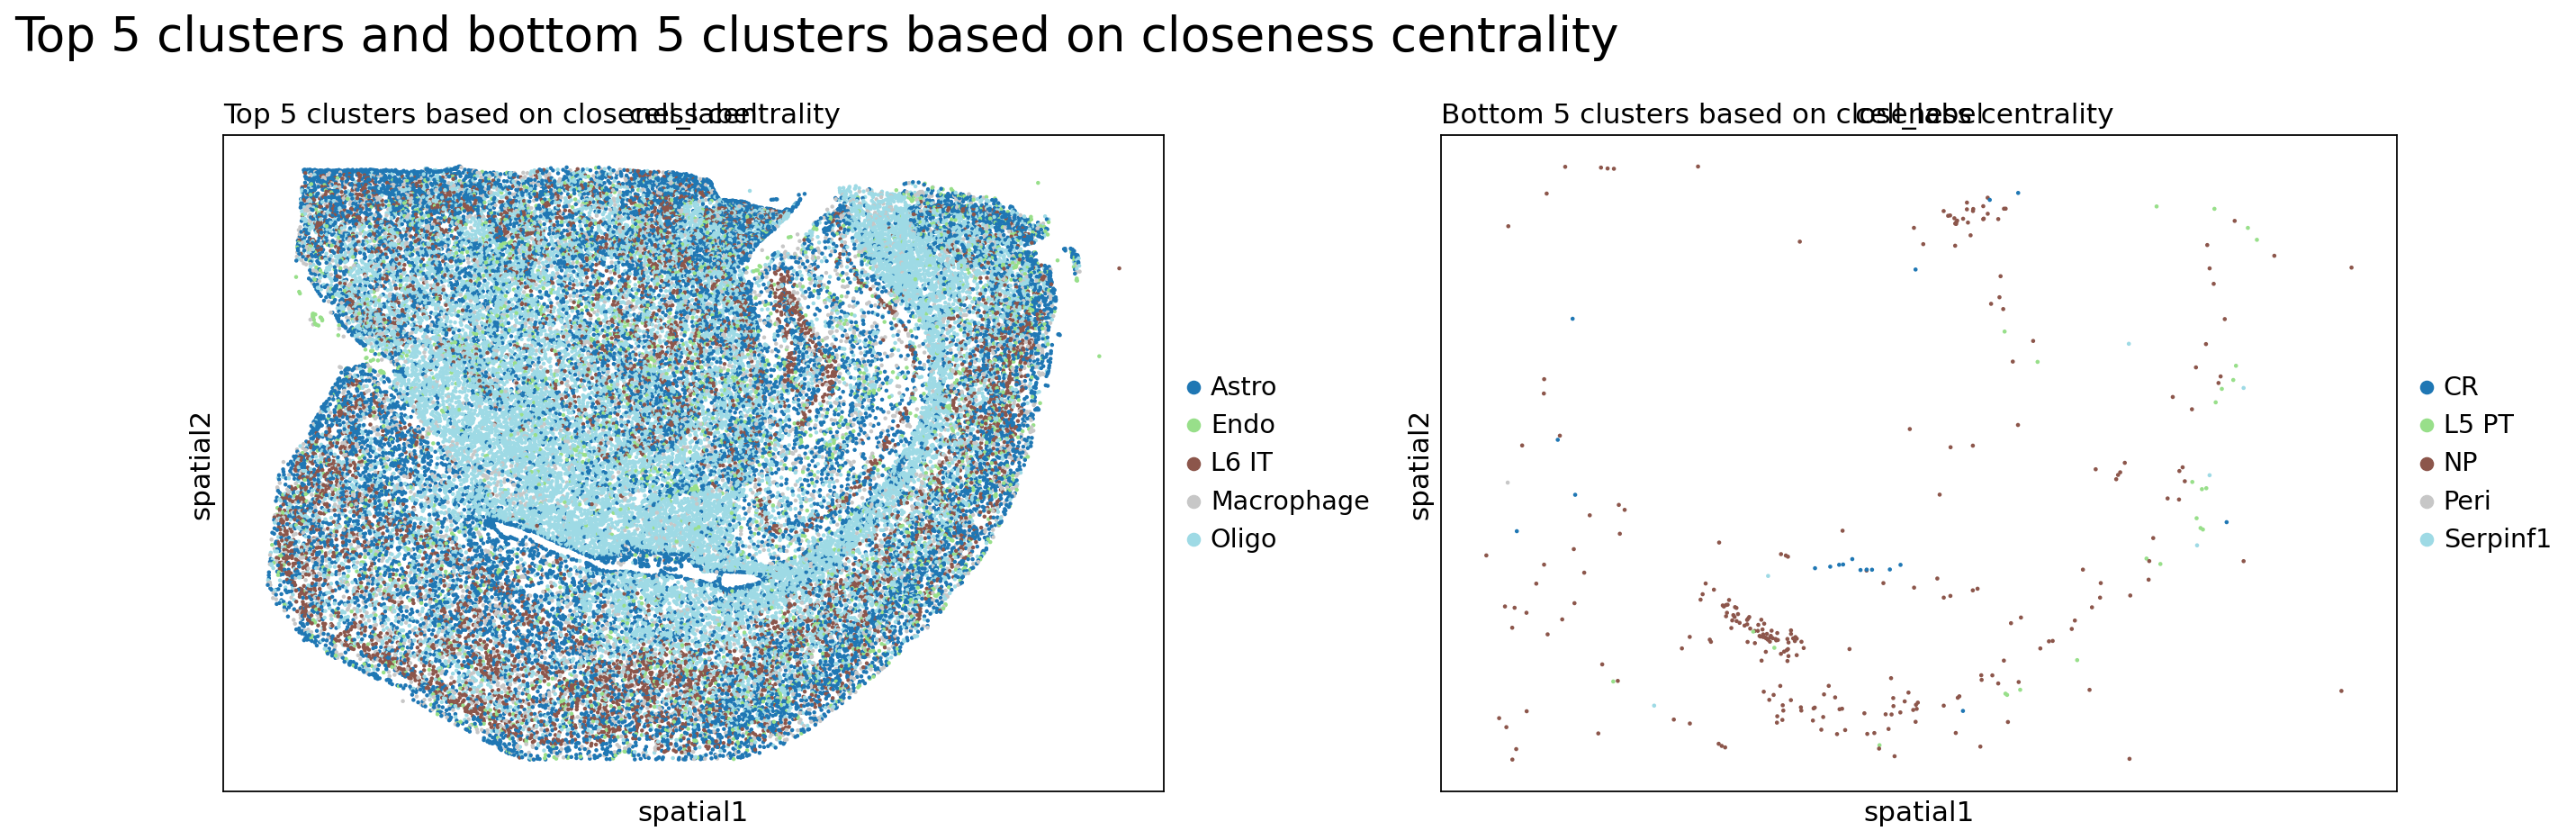

In [11]:
inst_clusters = ser_closeness.index.tolist()[:5]
print(inst_clusters)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle("Top 5 clusters and bottom 5 clusters based on closeness centrality", fontsize=24, y=1.05, x=0.4)

sq.pl.spatial_scatter(
    adata, groups=inst_clusters, color="cell_label", size=15, img=False, figsize=(10, 10), palette="tab20", ax=axs[0]
)
axs[0].set_title("Top 5 clusters based on closeness centrality", loc="left")


inst_clusters = ser_closeness.index.tolist()[-5:]
print(inst_clusters)
sq.pl.spatial_scatter(
    adata, groups=inst_clusters, color="cell_label", size=15, img=False, figsize=(10, 10), palette="tab20", ax=axs[1]
)
axs[1].set_title("Bottom 5 clusters based on closeness centrality", loc="left")

In [25]:
sq.gr.ripley(adata, 
                  cluster_key='cell_label', 
                  mode='L', 
                  spatial_key='spatial', 
                  metric='euclidean', 
                  n_neigh=2, 
                  n_simulations=50, n_observations=1000, 
                  max_dist=None, 
                  n_steps=50, 
                  seed=None, 
                  copy=False)


The Ripley output

In [21]:
df_cell_ripley=pd.DataFrame(adata.uns['cell_label_ripley_L']['L_stat'])
df_cell_ripley

,bins,cell_label,stats
0,0.000000,Astro,0.000000
1,79.507292,Astro,24.099816
2,159.014585,Astro,46.087680
3,238.521877,Astro,66.764337
4,318.029169,Astro,86.423104
...,...,...,...
1145,3577.828155,Vip,15.360662
1146,3657.335448,Vip,15.559516
1147,3736.842740,Vip,15.768827
1148,3816.350032,Vip,15.975743


In [24]:
sim = pd.DataFrame(adata.uns['cell_label_ripley_L']['sims_stat'])
sim.columns = ['bins', 'cell_label', 'stats']
sim['cell_label'] = 'sim'
sim


,bins,cell_label,stats
0,0.000000,sim,0.000000
1,79.507292,sim,1.300172
2,159.014585,sim,2.659164
3,238.521877,sim,3.981121
4,318.029169,sim,5.260361
...,...,...,...
2495,3577.828155,sim,43.225532
2496,3657.335448,sim,43.783054
2497,3736.842740,sim,44.325839
2498,3816.350032,sim,44.842412


In [22]:
pd.DataFrame(adata.uns['cell_label_ripley_L']['pvalues'])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608
3,0.0,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608
4,0.0,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.450980,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608
8,0.0,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608
9,0.0,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Let's compare the centrality scores with their corresponding Ripley's L scores

In [26]:

df_cell_ripley_high_cen = df_cell_ripley[df_cell_ripley['cell_label'].isin(ser_closeness.index.tolist()[:5])].copy()
df_cell_ripley_low_cen = df_cell_ripley[df_cell_ripley['cell_label'].isin(ser_closeness.index.tolist()[-5:])].copy()

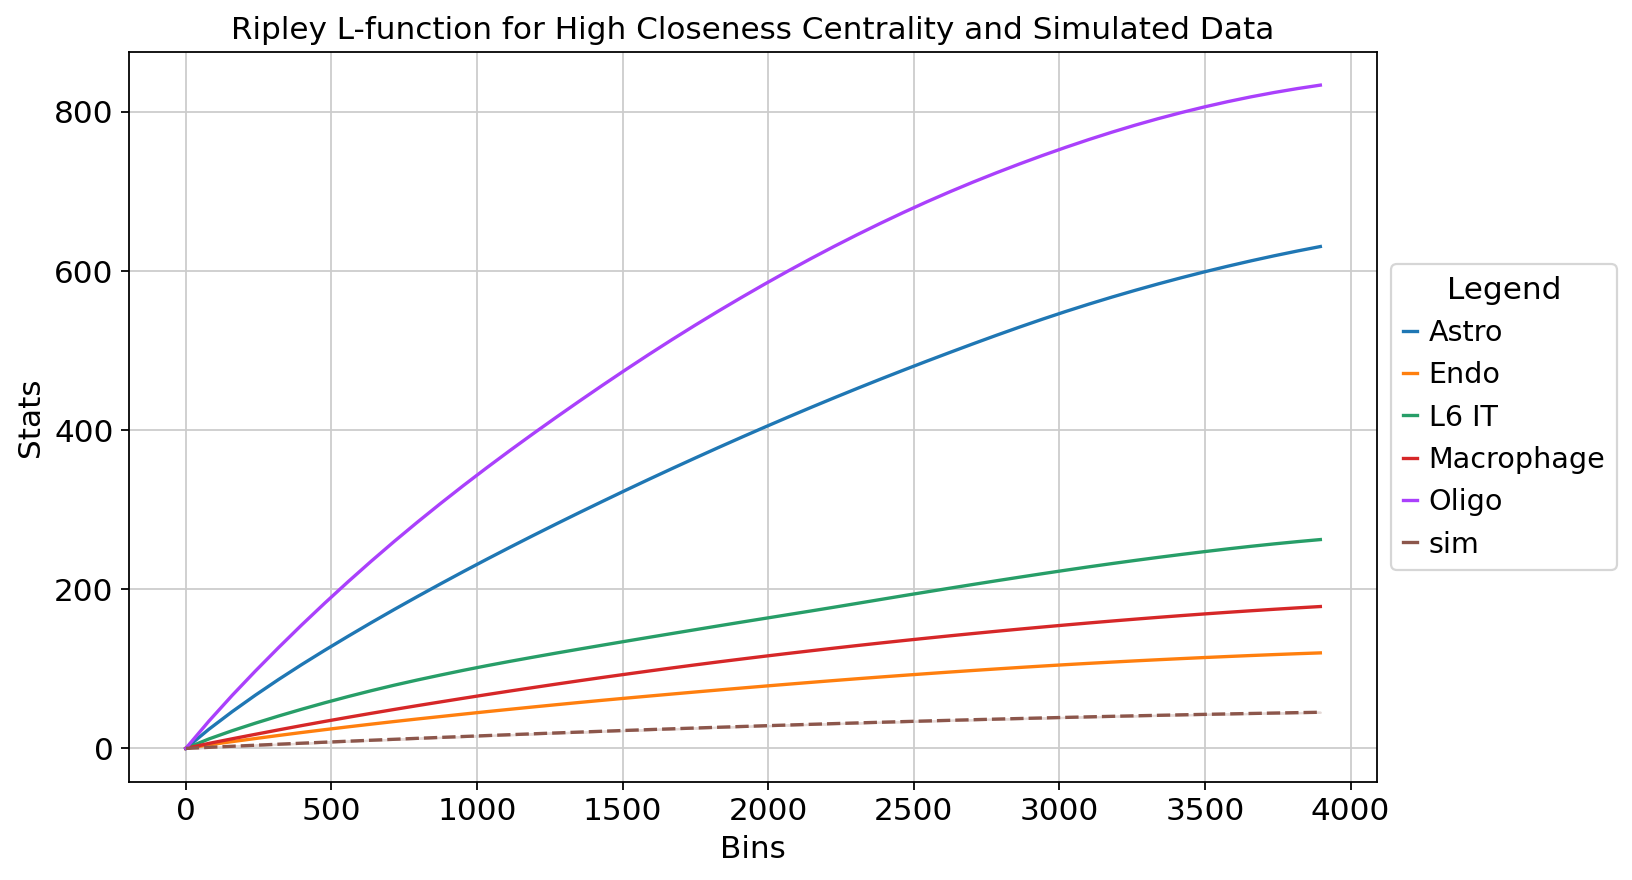

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming sim DataFrame has similar structure with 'bins', 'stats', and 'cell_label' or equivalent columns
# If necessary, adjust the columns to match those in df_cell_ripley_high_cen

# Add a distinguishing column
df_cell_ripley_high_cen['source'] = 'High Closeness Centrality'
sim['source'] = 'Simulated Data'

# Ensure columns match, renaming if necessary
# Assuming sim has columns 'bins' and 'stats' similar to df_cell_ripley_high_cen
# If 'cell_label' is not present, you may need to adjust accordingly
if 'cell_label' not in sim.columns:
    sim['cell_label'] = 'Simulated'  # or any other distinguishing label

# Concatenate DataFrames
combined_df = pd.concat([df_cell_ripley_high_cen, sim])

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='bins', y='stats', hue='cell_label', style='source', legend='brief')

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
# Filter out the legends that are in the combined DataFrame
filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in combined_df['cell_label'].unique()]
handles, labels = zip(*filtered_handles_labels)
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')

# Set plot title and labels
plt.title('Ripley L-function for High Closeness Centrality and Simulated Data')
plt.xlabel('Bins')
plt.ylabel('Stats')

# Show plot
plt.show()


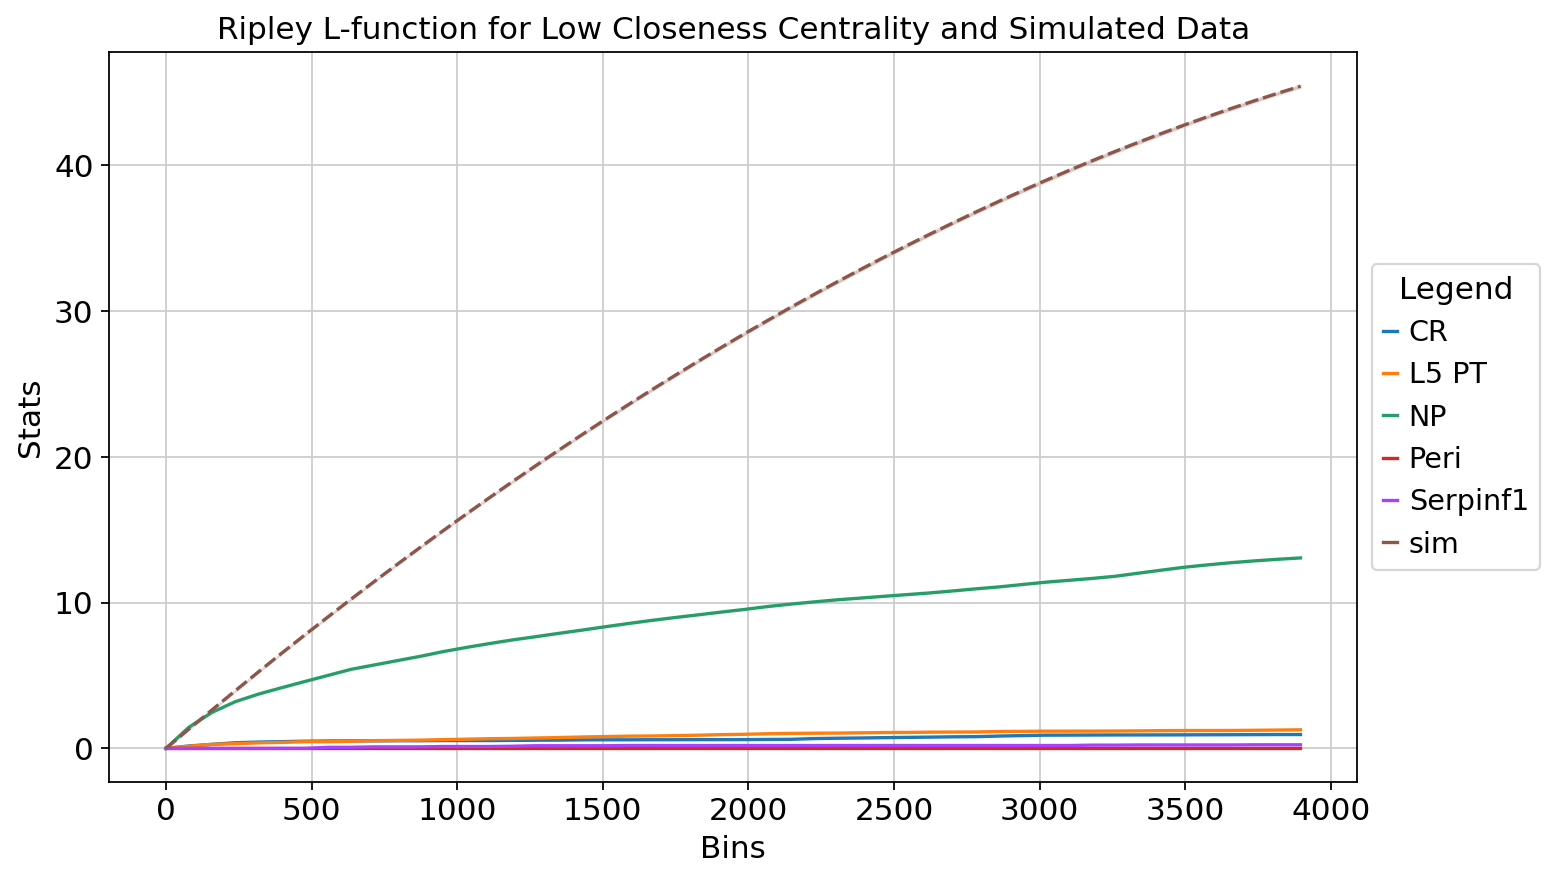

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a distinguishing column
df_cell_ripley_low_cen['source'] = 'Low Closeness Centrality'
sim['source'] = 'Simulated Data'

# Ensure columns match, renaming if necessary
if 'cell_label' not in sim.columns:
    sim['cell_label'] = 'Simulated'  # or any other distinguishing label

# Concatenate DataFrames
combined_df_low_cen = pd.concat([df_cell_ripley_low_cen, sim])

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df_low_cen, x='bins', y='stats', hue='cell_label', style='source', legend='brief')

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
# Filter out the legends that are in the combined DataFrame
filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in combined_df_low_cen['cell_label'].unique()]
handles, labels = zip(*filtered_handles_labels)
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')

# Set plot title and labels
plt.title('Ripley L-function for Low Closeness Centrality and Simulated Data')
plt.xlabel('Bins')
plt.ylabel('Stats')

# Show plot
plt.show()


NOW : PARTICIPANTS TO TRY ON THEIR OWN IN THE NEXT SCRIPT